#  Newspaper Sales Dataset - Linear Regression and Regularisation Methods

This notebook is a study on a dataset related to the sales of newspapers of a local stand. The intention of the code is to analyse and apply a model that can accurately predict the sales performance of the newspaper based on the different features available.<br>
In order to achieve this, 4 sklearn models are used: Linear Regression, Lasso Regression, Ridge Regression and Elastic Net Regression.<br>
The model is applied to dataset Newspaper_Sales, which is supplied separately in .csv format.<br><br>
This file contains 4 main sessions:<br>
- Dataset Overview
- Binary Linear Regression
- Multiple Linear Regression
- Regularisation Methods
    - L1 (Lasso)
    - L2 (Ridge)
    - Elastic Net
    - Evaluation of Regularisation Methods <br>
   
<b>Results Observation</b><br>
Intially, it's applied binary linear regression using the feature that has the best linear relationship with the target feature. However, as seen in the code below, the coefficient of determination (R-Squared) achieved with the first model applied was below satisfactory, at 0.72979. <br>
Following, it's applied multiple linear regression using all features available in the dataset against the target feature, this time achieving a coefficient of determination of 0.98824. It can also be observed a significant reduction of error based on the loss functions.<br>
In this notebook, it has also been explored the application of 3 different regularisation methods: L1 (Lasso), L2 (Ridge) and Elastic Net. The results of those applications have shown that the best regularisation method for this scenario is L2, however even then the improvement of score is minimal, from 0.98824 (multiple linear regression) to 0.98834 (Ridge Regression).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from statistics import mean 

## Dataset Overview

In [2]:
# Import the raw data into the programme and save as a Pandas dataframe to allow tabular visualisation
df = pd.read_csv('..\Newspaper_Sales.csv')

In [3]:
df.head()

,Advert Spend,Price,FP Story,Prize Value,Wet?,Sales
0,1757,60,Politics,30,1,50611
1,1695,45,Other,30,1,45457
2,2359,45,Sport,70,0,72836
3,1430,65,Royal,70,0,54503
4,2343,65,Royal,80,0,69931


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Advert Spend  371 non-null    int64 
 1   Price         371 non-null    int64 
 2   FP Story      371 non-null    object
 3   Prize Value   371 non-null    int64 
 4   Wet?          371 non-null    int64 
 5   Sales         371 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 17.5+ KB


Text(0, 0.5, '')

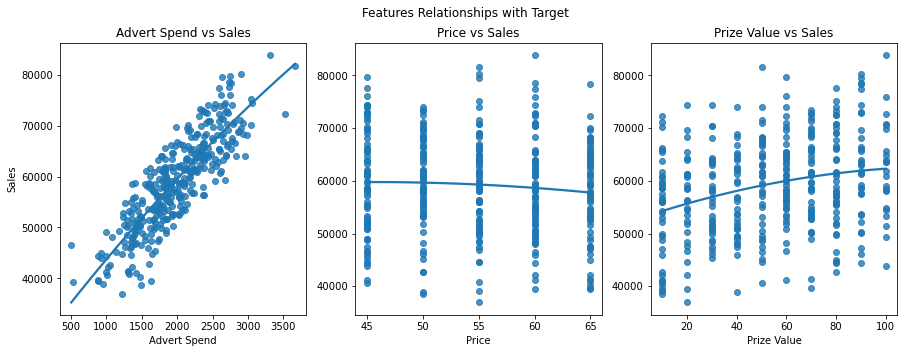

In [5]:
# Analyse the relationships between the features and the target field (Sales)
fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Features Relationships with Target')

sns.regplot(ax=axes[0], x ="Advert Spend", y ="Sales", data = df, order = 2, ci = None)
axes[0].set_title('Advert Spend vs Sales')

sns.regplot(ax=axes[1], x ="Price", y ="Sales", data = df, order = 2, ci = None)
axes[1].set_title('Price vs Sales')
axes[1].set_ylabel('')

sns.regplot(ax=axes[2], x ="Prize Value", y ="Sales", data = df, order = 2, ci = None)
axes[2].set_title('Prize Value vs Sales')
axes[2].set_ylabel('')

In [6]:
# Define target feature to be used on models
target_feature = "Sales"

## Binary Linear Regression

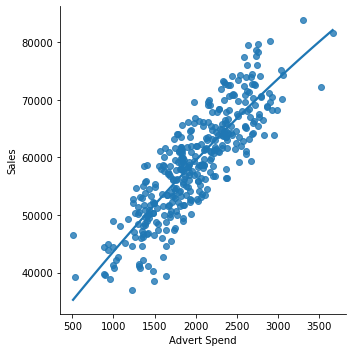

In [7]:
# For selected feature Advert Spend, visualise the relationship to target feature
sns.lmplot(x ="Advert Spend", y =target_feature, data = df, order = 2, ci = None) 
plt.show()

In [8]:
# Define X and y
X = np.array(df['Advert Spend']).reshape(-1, 1) 
y = np.array(df[target_feature]).reshape(-1, 1)

In [9]:
# Split the data into training (30%) and test (70%) sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.7, random_state=42)

print("Training Set number of rows: ",len(train_X))
print("Test Set number of rows: ",len(test_X))

Training Set number of rows:  111
Test Set number of rows:  260


In [10]:
# Define and train the model
sales_model = LinearRegression()
sales_model.fit(train_X,train_y)

LinearRegression()

In [11]:
# Predict on test data
predicted_sales = sales_model.predict(test_X)

In [12]:
# Calculate R^2
print(sales_model.score(test_X,test_y))

0.7297915720096602


In [13]:
# Calculate cost functions
print("Mean Squared Error: ",mse(test_y, predicted_sales))
print("Mean Absolute Error: ",mae(test_y, predicted_sales))
print("Root Mean Squared Error: ",np.sqrt(mse(test_y, predicted_sales)))

Mean Squared Error:  22292416.361537647
Mean Absolute Error:  3786.0429696737046
Root Mean Squared Error:  4721.484550598217


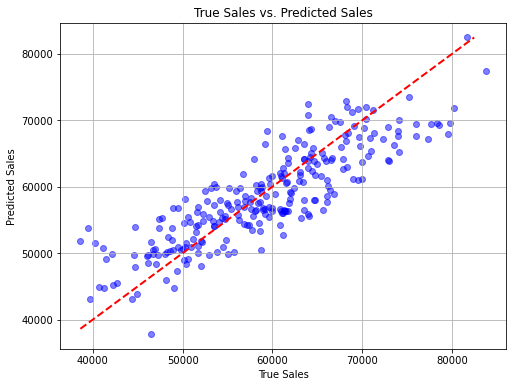

In [14]:
# Visualize predictions vs. true values using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_y, predicted_sales, alpha=0.5, color='blue')
plt.plot([test_y.min(), predicted_sales.max()], 
         [test_y.min(), predicted_sales.max()], 'r--', lw=2)
plt.title('True Sales vs. Predicted Sales')
plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

## Multiple Linear Regression

In [15]:
# Implement One Hot Encoding to the data to deal with categorical features
df = pd.get_dummies(df, columns = ['FP Story'])
df

,Advert Spend,Price,Prize Value,Wet?,Sales,FP Story_Other,FP Story_Politics,FP Story_Royal,FP Story_Sport,FP Story_World
0,1757,60,30,1,50611,0,1,0,0,0
1,1695,45,30,1,45457,1,0,0,0,0
2,2359,45,70,0,72836,0,0,0,1,0
3,1430,65,70,0,54503,0,0,1,0,0
4,2343,65,80,0,69931,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
366,2697,45,10,0,70238,0,0,1,0,0
367,1683,60,80,0,56848,0,1,0,0,0
368,1235,65,70,0,52755,0,0,0,1,0
369,1598,60,40,0,51524,0,1,0,0,0


In [16]:
# Redefine X and y
X = df.drop(columns=[target_feature])
y = df[target_feature]

In [17]:
# Split the data into training (30%) and test (70%) sets again
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.7, random_state=42)

print("Training Set number of rows: ",len(train_X))
print("Test Set number of rows: ",len(test_X))

Training Set number of rows:  111
Test Set number of rows:  260


In [18]:
# Train model
sales_model.fit(train_X,train_y)

LinearRegression()

In [19]:
# Predict on test data
predicted_sales = sales_model.predict(test_X)

In [20]:
# Calculate R^2
print(sales_model.score(test_X,test_y))

0.9882401102460628


In [21]:
# Calculate cost functions
print("Mean Squared Error: ",mse(test_y, predicted_sales))
print("Mean Absolute Error: ",mae(test_y, predicted_sales))
print("Root Mean Squared Error: ",np.sqrt(mse(test_y, predicted_sales)))

Mean Squared Error:  970200.52524017
Mean Absolute Error:  780.3429682849486
Root Mean Squared Error:  984.9875761856948


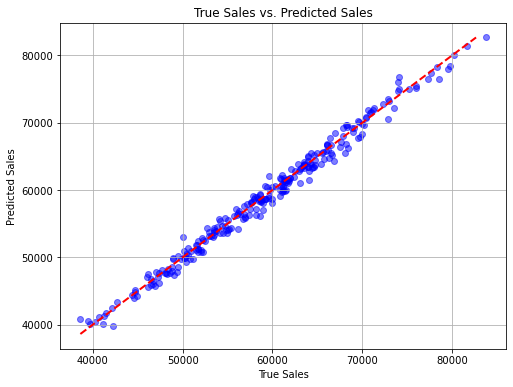

In [22]:
# Visualize predictions vs. true values using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_y, predicted_sales, alpha=0.5, color='blue')
plt.plot([test_y.min(), predicted_sales.max()], 
         [test_y.min(), predicted_sales.max()], 'r--', lw=2)
plt.title('True Sales vs. Predicted Sales')
plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

## Regularisation Methods

### L1 (Lasso)

In [23]:
# Use a loop to analyse the best value for alpha based on model score
cross_validation_L1_scores = {}

for i in range(1, 10): 
    lasso_best_model = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lasso_best_model.fit(train_X, train_y)
    scores = cross_val_score(lasso_best_model, X, y) 
    avg_cross_val_score = mean(scores)*100
    cross_validation_L1_scores.update({(i*0.25):avg_cross_val_score})

max_score = max(cross_validation_L1_scores.values())
max_score_alpha = list(filter(lambda value: cross_validation_L1_scores[value] == max_score, cross_validation_L1_scores))
print("Alphas with max score: ",str(max_score_alpha))

Alphas with max score:  [0.25]


In [24]:
# Define and Fit the Lasso Regression Model using the alpha with max score from previous step
lasso_sales_model = Lasso(alpha = max_score_alpha[0], tol = 0.0925) 
lasso_sales_model.fit(train_X, train_y)

# Evaluate the Lasso Regression model 
print(lasso_sales_model.score(test_X,test_y))

0.9882820588340239


### L2 (Ridge)

In [25]:
# Use a loop to analyse the best value for alpha based on model score
cross_validation_L2_scores = {}

for i in range(1, 10): 
    ridge_best_model = Ridge(alpha = i * 0.25)
    ridge_best_model.fit(train_X, train_y)
    scores = cross_val_score(ridge_best_model, X, y) 
    avg_cross_val_score = mean(scores)*100
    cross_validation_L2_scores.update({(i*0.25):avg_cross_val_score})
    
max_score = max(cross_validation_L2_scores.values())
max_score_alpha = list(filter(lambda value: cross_validation_L2_scores[value] == max_score, cross_validation_L2_scores))
print("Alphas with max score: ",str(max_score_alpha))

Alphas with max score:  [0.25]


In [26]:
# Define and Fit the Ridge Regression Model using the alpha with max score from previous step
ridge_sales_model = Ridge(alpha = max_score_alpha[0]) 
ridge_sales_model.fit(train_X, train_y)

# Evaluate the Ridge Regression model 
print(ridge_sales_model.score(test_X,test_y))

0.9883373055185483


### Elastic Net

In [27]:
# Define and fit Elastic Net model
# Alpha set to 0.25 as we saw in the L1 and L2 methods that this is the value of alpha that achieves best score
elastic_net_sales_model = ElasticNet(alpha = 0.25) 
elastic_net_sales_model.fit(train_X, train_y) 

# Evaluate the Elastic Net Regression model 
print(elastic_net_sales_model.score(test_X,test_y))

0.9636681651822869


### Evaluation of Regularisation Methods

Linear Regression: 0.98824
L1: 0.98828
L2: 0.98834
Elastic Net: 0.96367


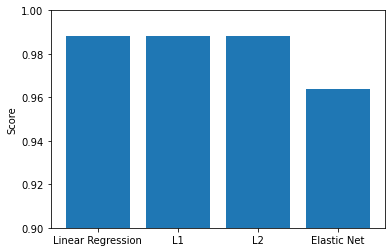

In [28]:
# Build the models and scores list
models = ['Linear Regression', 'L1', 'L2', 'Elastic Net'] 
scores = [sales_model.score(test_X,test_y), 
         lasso_sales_model.score(test_X,test_y), 
         ridge_sales_model.score(test_X,test_y),
         elastic_net_sales_model.score(test_X,test_y)] 
  
# Build the dictionary to compare the scores
mapping = dict(zip(models,scores))
  
# Print the scores for different models 
for key, val in mapping.items():
    print(f'{key}: {val:.5f}')
    
# Plot the scores 
plt.bar(models, scores)
plt.ylabel('Score')
plt.ylim(bottom=0.9, top=1)
plt.show() 

The best method analysed on this notebook for this scenario and dataset is the Ridge Regression, achieving a score of 0.98834 on test data.